<a href="https://colab.research.google.com/github/uabali/Machine-Learning/blob/main/Classification(wifi_value).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
##Gerekli kutuphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold, cross_val_score
##Kullanılacak Metrikler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
## Modelin egitilecegi algoritmalar
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [132]:
df = pd.read_csv("/content/dataset.csv")
print(df.head())
print(f"\nDatasetin boyutu: {df.shape}")
print(f"\nDatasetteki verilerin turleri: \n{df.dtypes}")
print(f"\nDatasetteki Sutun isimleri: \n{df.columns}")

    U   M   T   A   B   L   I  Siniflar
0 -64 -56 -61 -66 -71 -82 -81         1
1 -68 -57 -61 -65 -71 -85 -85         1
2 -63 -60 -60 -67 -76 -85 -84         1
3 -61 -60 -68 -62 -77 -90 -80         1
4 -63 -65 -60 -63 -77 -81 -87         1

Datasetin boyutu: (2000, 8)

Datasetteki verilerin turleri: 
U           int64
M           int64
T           int64
A           int64
B           int64
L           int64
I           int64
Siniflar    int64
dtype: object

Datasetteki Sutun isimleri: 
Index(['U', 'M', 'T', 'A', 'B', 'L', 'I', 'Siniflar'], dtype='object')


Veri setini karistirdim

In [133]:
df = df.sample(frac=1,random_state=63).reset_index(drop=True)
df.head(5)

,U,M,T,A,B,L,I,Siniflar
0,-48,-51,-53,-48,-64,-81,-79,3
1,-40,-54,-52,-39,-65,-70,-74,2
2,-56,-48,-43,-62,-43,-83,-82,4
3,-42,-55,-49,-45,-64,-70,-65,2
4,-61,-56,-57,-56,-75,-74,-81,1


In [134]:
X = df.drop("Siniflar", axis=1)
y = df["Siniflar"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [135]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [136]:
X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6
0,-0.937648,-0.142516,0.751866,-0.905955,1.511549,-1.079872,-1.133380
1,-0.412692,0.743594,-0.180392,-0.385416,-0.578182,0.895098,0.234771
2,-0.937648,0.448224,0.006060,-0.905955,-1.018125,-0.472189,0.082754
3,0.024771,1.334333,1.497673,0.395393,-0.138238,0.135494,0.538804
4,-1.025140,-0.142516,-1.672006,-1.166225,-1.568055,-0.016426,-0.525313


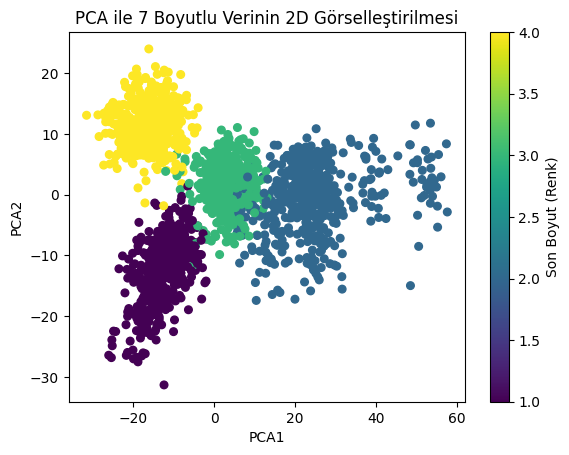

In [137]:
# 2D'ye indirgeme
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df)

plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c=df.iloc[:, -1], cmap='viridis', s=30)
plt.colorbar(label='Son Boyut (Renk)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA ile 7 Boyutlu Verinin 2D Görselleştirilmesi')
plt.show()

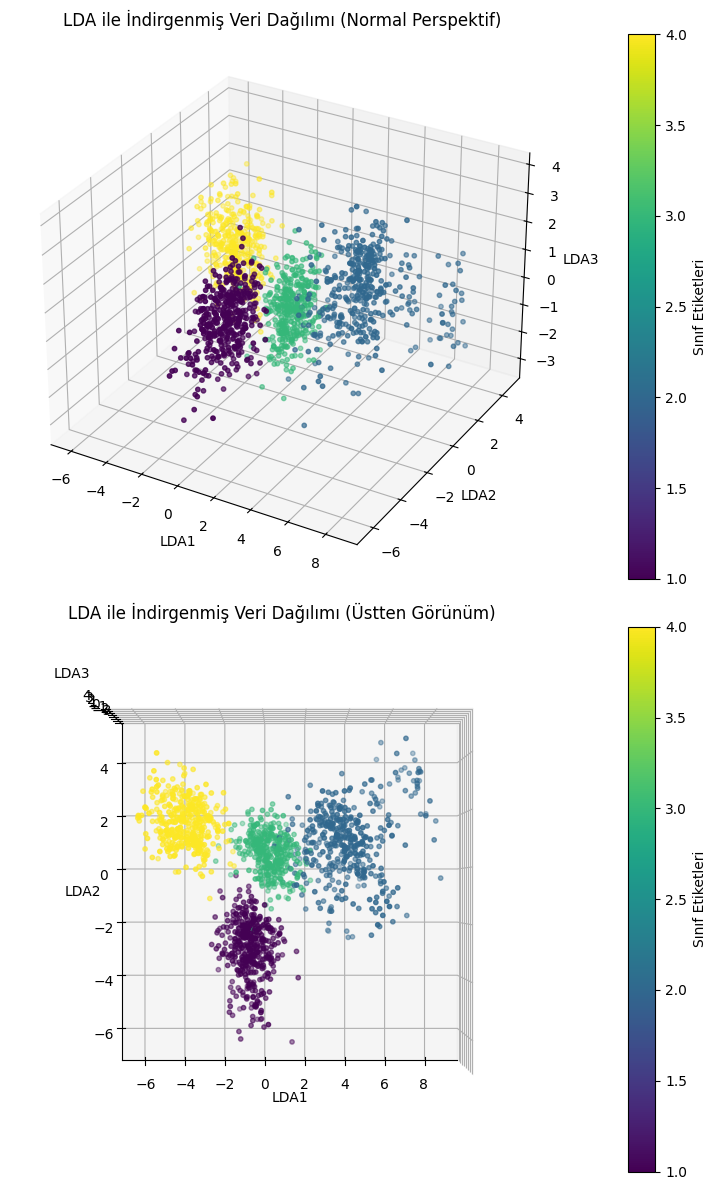

In [138]:
# LDA ile boyut indirgeme
lda = LDA(n_components=3)
X_lda = lda.fit_transform(X_train, y_train)  # Eğitim verisini kullanarak LDA fit edilir

# Şekil ve eksen oluşturma
fig = plt.figure(figsize=(15, 12))

# 1. Grafik: Normal 3D Perspektif
ax1 = fig.add_subplot(211, projection='3d')
scatter1 = ax1.scatter(
    X_lda[:, 0],  # LDA1
    X_lda[:, 1],  # LDA2
    X_lda[:, 2],  # LDA3
    c=y_train,    # Sınıf etiketlerini renk olarak kullan
    cmap='viridis',
    s=10          # Nokta boyutu
)
ax1.set_title('LDA ile İndirgenmiş Veri Dağılımı (Normal Perspektif)')
ax1.set_xlabel('LDA1')
ax1.set_ylabel('LDA2')
ax1.set_zlabel('LDA3')
plt.colorbar(scatter1, ax=ax1, label='Sınıf Etiketleri')

# 2. Grafik: Üstten Görünüm
ax2 = fig.add_subplot(212, projection='3d')
scatter2 = ax2.scatter(
    X_lda[:, 0],  # LDA1
    X_lda[:, 1],  # LDA2
    X_lda[:, 2],  # LDA3
    c=y_train,    # Sınıf etiketlerini renk olarak kullan
    cmap='viridis',
    s=10          # Nokta boyutu
)
ax2.view_init(elev=90, azim=-90)  # Yukarıdan görünüm için ayar
ax2.set_title('LDA ile İndirgenmiş Veri Dağılımı (Üstten Görünüm)')
ax2.set_xlabel('LDA1')
ax2.set_ylabel('LDA2')
ax2.set_zlabel('LDA3')
plt.colorbar(scatter2, ax=ax2, label='Sınıf Etiketleri')

plt.tight_layout()
plt.show()

In [139]:
df.head()

,U,M,T,A,B,L,I,Siniflar
0,-48,-51,-53,-48,-64,-81,-79,3
1,-40,-54,-52,-39,-65,-70,-74,2
2,-56,-48,-43,-62,-43,-83,-82,4
3,-42,-55,-49,-45,-64,-70,-65,2
4,-61,-56,-57,-56,-75,-74,-81,1


In [140]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, random_state=63)

# 4-fold Cross Validation
kf = KFold(n_splits=4, shuffle=True, random_state=63)

# Çapraz doğrulama skorları
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf)

# Çapraz doğrulama varyansı
rf_cv_var = np.var(rf_cv_scores)

# Modeli eğit
rf_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
rf_y_pred = rf_model.predict(X_test)

# Performans metriklerini hesapla
rf_metrics = {
    "Accuracy": accuracy_score(y_test, rf_y_pred),
    "Precision": precision_score(y_test, rf_y_pred, average='weighted'),
    "Recall": recall_score(y_test, rf_y_pred, average='weighted'),
    "F1": f1_score(y_test, rf_y_pred, average='weighted')
}

# Sonuçları yazdır
print("Cross-Validation Scores (4-fold):", rf_cv_scores)
print("Variance of CV Scores:", rf_cv_var)
print("Random Forest Model Metrics:")
for metric, value in rf_metrics.items():
    print(f"{metric}: {value:.5f}")

Cross-Validation Scores (4-fold): [0.985  0.9775 0.99   0.985 ]
Variance of CV Scores: 1.9921874999999846e-05
Random Forest Model Metrics:
Accuracy: 0.98750
Precision: 0.98757
Recall: 0.98750
F1: 0.98749


In [141]:
# SVM Modeli (Hard Margin için yüksek C)
svm_model = SVC(kernel='rbf', random_state=63)

# 4-fold Cross Validation
kf = KFold(n_splits=4, shuffle=True, random_state=63)

# Cross-validation scores
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=kf)

# Variance of cross-validation scores
svm_cv_var = np.var(svm_cv_scores)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_y_pred = svm_model.predict(X_test)

# Calculate performance metrics
svm_metrics = {
    "Accuracy": accuracy_score(y_test, svm_y_pred),
    "Precision": precision_score(y_test, svm_y_pred, average='weighted'),
    "Recall": recall_score(y_test, svm_y_pred, average='weighted'),
    "F1": f1_score(y_test, svm_y_pred, average='weighted')
}

# Print the results
print("Cross-Validation Scores (4-fold):", svm_cv_scores)
print("Variance of CV Scores:", svm_cv_var)
print("SVM Model Metrics:")
for metric, value in svm_metrics.items():
    print(f"{metric}: {value:.5f}")

Cross-Validation Scores (4-fold): [0.975  0.975  0.9925 0.985 ]
Variance of CV Scores: 5.429687500000039e-05
SVM Model Metrics:
Accuracy: 0.98000
Precision: 0.98010
Recall: 0.98000
F1: 0.97994


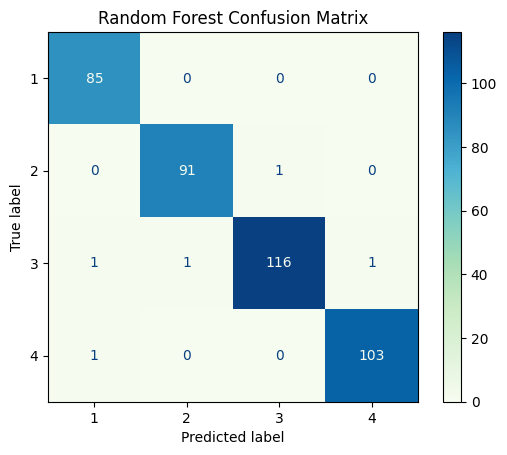

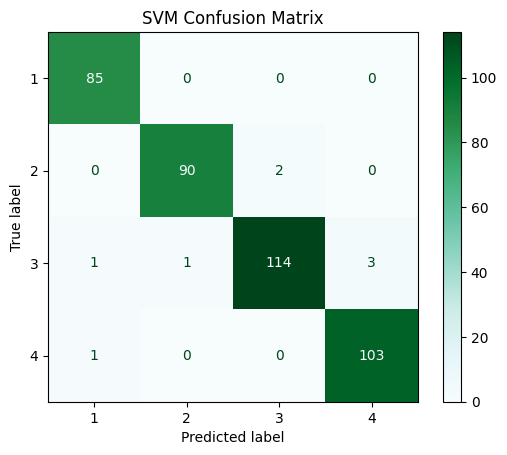

In [142]:
# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_model.classes_)
disp_rf.plot(cmap='GnBu')
plt.title('Random Forest Confusion Matrix')
plt.show()

# SVM Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_y_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=svm_model.classes_)
disp_svm.plot(cmap='BuGn')
plt.title('SVM Confusion Matrix')
plt.show()

In [143]:
# LDA ile boyut indirgeme
lda = LDA(n_components=3)  # 4 sınıf olduğundan, en fazla 3 boyut indirgeme
X_train_lda = lda.fit_transform(X_train, y_train)  # LDA, eğitim verileriyle fit edilir
X_test_lda = lda.transform(X_test)  # Test verisine aynı dönüşüm uygulanır

# SVM modeli (sigmoid çekirdeği ile)
svm_model = SVC(kernel='linear', random_state=63)

# 4-fold Cross Validation
kf = KFold(n_splits=4, shuffle=True, random_state=63)

# LDA ile indirgenmiş veriyi kullanarak çapraz doğrulama
svm_cv_scores = cross_val_score(svm_model, X_train_lda, y_train, cv=kf)

# Çapraz doğrulama varyansı
svm_cv_var = np.var(svm_cv_scores)

# SVM modelini eğit
svm_model.fit(X_train_lda, y_train)

# Test seti üzerinde tahmin yap
svm_y_pred = svm_model.predict(X_test_lda)

# Performans metriklerini hesapla
svm_metrics = {
    "Accuracy": accuracy_score(y_test, svm_y_pred),
    "Precision": precision_score(y_test, svm_y_pred, average='weighted'),
    "Recall": recall_score(y_test, svm_y_pred, average='weighted'),
    "F1": f1_score(y_test, svm_y_pred, average='weighted')
}

# Sonuçları yazdır
print("Cross-Validation Scores (4-fold):", svm_cv_scores)
print("Variance of CV Scores:", svm_cv_var)
print("SVM Model Metrics:")
for metric, value in svm_metrics.items():
    print(f"{metric}: {value:.5f}")

Cross-Validation Scores (4-fold): [0.9725 0.9675 0.9825 0.9775]
Variance of CV Scores: 3.1250000000000055e-05
SVM Model Metrics:
Accuracy: 0.97000
Precision: 0.97007
Recall: 0.97000
F1: 0.96982


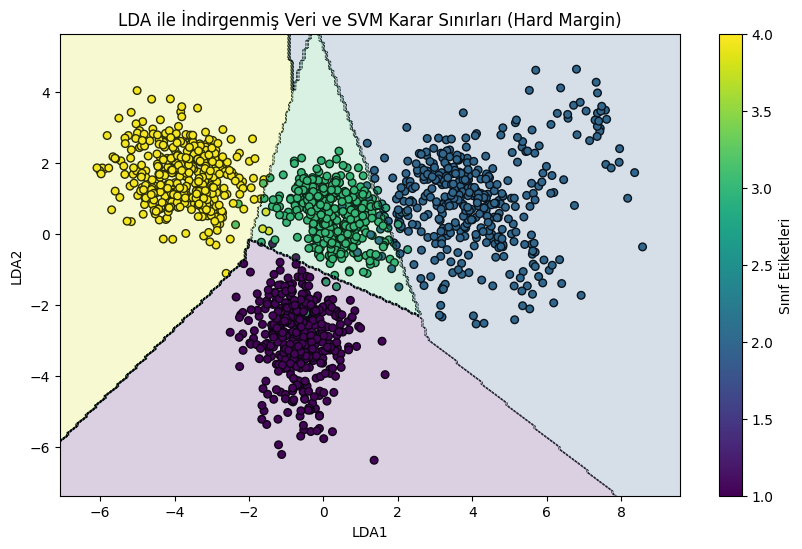

In [144]:
# LDA ile boyut indirgeme (2 boyut)
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# SVM modeli (Hard Margin için C çok büyük bir değer seçildi)
svm_model = SVC(kernel='linear', C=1e6)  # Hard Margin
svm_model.fit(X_train_lda, y_train)

# Karar sınırlarını görselleştirme
plt.figure(figsize=(10, 6))

# Eğitim verisinin dağılımını çiz
scatter = plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', s=30, edgecolors='k')

# Karar sınırlarını hesaplamak için grid
x_min, x_max = X_train_lda[:, 0].min() - 1, X_train_lda[:, 0].max() + 1
y_min, y_max = X_train_lda[:, 1].min() - 1, X_train_lda[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Her bir noktayı sınıflandır
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Karar sınırlarını çiz
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
plt.contour(xx, yy, Z, colors='k', linewidths=0.5, linestyles='--')

# Grafik ayarları
plt.title('LDA ile İndirgenmiş Veri ve SVM Karar Sınırları (Hard Margin)')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.colorbar(scatter, label='Sınıf Etiketleri')
plt.show()

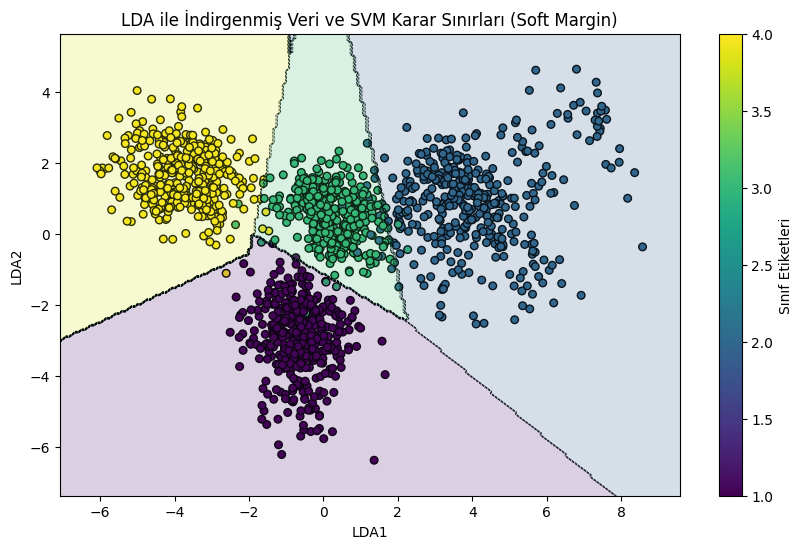

In [145]:
# LDA ile boyut indirgeme (2 boyut)
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# SVM modeli (Hard Margin için C çok büyük bir değer seçildi)
svm_model = SVC(kernel='linear', C=1)  # Hard Margin
svm_model.fit(X_train_lda, y_train)

# Karar sınırlarını görselleştirme
plt.figure(figsize=(10, 6))

# Eğitim verisinin dağılımını çiz
scatter = plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', s=30, edgecolors='k')

# Karar sınırlarını hesaplamak için grid
x_min, x_max = X_train_lda[:, 0].min() - 1, X_train_lda[:, 0].max() + 1
y_min, y_max = X_train_lda[:, 1].min() - 1, X_train_lda[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Her bir noktayı sınıflandır
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Karar sınırlarını çiz
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
plt.contour(xx, yy, Z, colors='k', linewidths=0.5, linestyles='--')

# Grafik ayarları
plt.title('LDA ile İndirgenmiş Veri ve SVM Karar Sınırları (Soft Margin)')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.colorbar(scatter, label='Sınıf Etiketleri')
plt.show()

In [130]:
# Hard Margin SVM
svm_hard = SVC(kernel='linear', C=1e6, random_state=42)
svm_hard.fit(X_train, y_train)
hard_y_pred = svm_hard.predict(X_test)

# Soft Margin SVM
svm_soft = SVC(kernel='linear', C=1, random_state=42)
svm_soft.fit(X_train, y_train)
soft_y_pred = svm_soft.predict(X_test)

# Metriklerin hesaplanması
metrics = {
    "Accuracy": accuracy_score,
    "Precision": lambda y_true, y_pred: precision_score(y_true, y_pred, average='weighted'),
    "Recall": lambda y_true, y_pred: recall_score(y_true, y_pred, average='weighted'),
    "F1": lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted')
}

# Hard ve Soft Margin sonuçlarını hesaplama
results = {"Hard Margin": {}, "Soft Margin": {}}
for metric_name, metric_func in metrics.items():
    results["Hard Margin"][metric_name] = metric_func(y_test, hard_y_pred)
    results["Soft Margin"][metric_name] = metric_func(y_test, soft_y_pred)

# Sonuçları yazdır
for margin, result in results.items():
    print(f"\n{margin} Metrics:")
    for metric_name, value in result.items():
        print(f"{metric_name}: {value:.4f}")


Hard Margin Metrics:
Accuracy: 0.9750
Precision: 0.9753
Recall: 0.9750
F1: 0.9749

Soft Margin Metrics:
Accuracy: 0.9800
Precision: 0.9800
Recall: 0.9800
F1: 0.9799


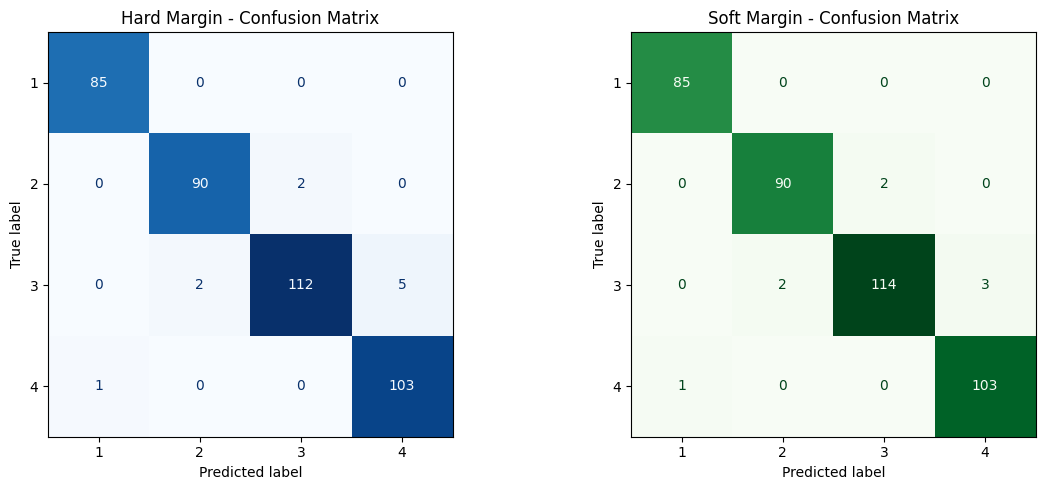

In [146]:
# Hard Margin SVM
svm_hard = SVC(kernel='linear', C=1e6, random_state=42)  # C büyük (Hard Margin)
svm_hard.fit(X_train, y_train)
hard_y_pred = svm_hard.predict(X_test)

# Soft Margin SVM
svm_soft = SVC(kernel='linear', C=1, random_state=42)  # C küçük (Soft Margin)
svm_soft.fit(X_train, y_train)
soft_y_pred = svm_soft.predict(X_test)

# Hard Margin Confusion Matrix
cm_hard = confusion_matrix(y_test, hard_y_pred)
disp_hard = ConfusionMatrixDisplay(confusion_matrix=cm_hard, display_labels=svm_hard.classes_)

# Soft Margin Confusion Matrix
cm_soft = confusion_matrix(y_test, soft_y_pred)
disp_soft = ConfusionMatrixDisplay(confusion_matrix=cm_soft, display_labels=svm_soft.classes_)

# Görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Hard Margin Confusion Matrix
axes[0].set_title("Hard Margin - Confusion Matrix")
disp_hard.plot(ax=axes[0], cmap="Blues", colorbar=False)

# Soft Margin Confusion Matrix
axes[1].set_title("Soft Margin - Confusion Matrix")
disp_soft.plot(ax=axes[1], cmap="Greens", colorbar=False)

plt.tight_layout()
plt.show()